
## Sampling und Filterung des Korpus

Für die weitere Analyse konzentrieren wir uns auf den Zeitraum **1800–1900**.
Zudem möchten wir sicherstellen, dass jedes Jahrzehnt annähernd gleich stark vertreten ist.|

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
meta = pd.read_csv('../metadata/metadata_corpus-german_language_fiction.csv')
meta.head()

,lastname,firstname,title,year,volume,ID
0,Walloth,Wilhelm,Das Schatzhaus des Königs,1883,NaN,Wilhelm_Walloth_-_Das_Schatzhaus_des_Königs_(1...
1,Däubler,Theodor,L'Africana,1928,NaN,Theodor_Däubler_-_L'Africana_(1928)
2,Eyth,Max,Der Schneider von Ulm,1906,NaN,Max_Eyth_-_Der_Schneider_von_Ulm_(1906)
3,Novalis,NaN,Die Lehrlinge zu Sais,1799,NaN,Novalis_-_Die_Lehrlinge_zu_Sais_(1799)
4,Wieland,Christoph Martin,Agathodämon,1799,NaN,Christoph_Martin_Wieland_-_Agathodämon_(1799)


Filterung

In [6]:
subset = meta.query("1800 <= year <= 1900")

# Optional: pro Jahrzehnt 10 Texte zufällig ziehen
subset_decades = (
    subset.groupby(subset['year']//10*10)
    .apply(lambda x: x.sample(n=min(10, len(x)), random_state=42))
    .reset_index(drop=True)
)

In [7]:
subset_decades

,lastname,firstname,title,year,volume,ID
0,Mereau,Sophie,Amanda und Eduard,1803,NaN,Sophie_Mereau_-_Amanda_und_Eduard_(1803)
1,Fouqué,Friedrich de la Motte,Alwin,1808,NaN,Friedrich_de_la_Motte_Fouqué_-_Alwin_(1808)
2,Fischer,Caroline Auguste,Selim und Zoraïde,1802,NaN,Caroline_Auguste_Fischer_-_Selim_und_Zoraïde_(...
3,Zschokke,Heinrich,Alamontade,1803,NaN,Heinrich_Zschokke_-_Alamontade_(1803)
4,von Goethe,Johann Wolfgang,Die Wahlverwandtschaften,1809,NaN,Johann_Wolfgang_von_Goethe_-_Die_Wahlverwandts...
...,...,...,...,...,...,...
105,Wichert,Ernst,Das Duell,1900,NaN,Ernst_Wichert_-_Das_Duell_(1900)
106,von Ebner-Eschenbach,Marie,Erzählungen und andere Werke,1900,NaN,Marie_von_Ebner-Eschenbach_-_Erzählungen_und_a...
107,Scheerbart,Paul,Die wilde Jagd,1900,NaN,Paul_Scheerbart_-_Die_wilde_Jagd_(1900)
108,Spielhagen,Friedrich,Frei geboren,1900,NaN,Friedrich_Spielhagen_-_Frei_geboren_(1900)


In [11]:
# Anzahl der Texte pro Jahrzehnt
def summarize_texts_per_decade(df, decade_column):
    """Return per-yearcounts and summary stats for the given year column."""
    bins = df[decade_column].dropna()
    if bins.empty:
        raise ValueError(f"No year values found in column '{decade_column}'.")
    bins = bins.astype(int)
    counts = bins.value_counts().sort_index()
    stats = counts.agg(['mean', 'max', 'min']).rename({'mean': 'avg_per_year'})
    return counts, stats

subset_decades['decade'] = (subset_decades['year'] // 10) * 10
decade_counts, decade_stats = summarize_texts_per_decade(subset_decades, 'decade')

print("Textanzahl der Texte im Subset pro Jahrzehnt:")
print(decade_stats)

Textanzahl der Texte im Subset pro Jahrzehnt:
avg_per_year    10.0
max             10.0
min             10.0
Name: count, dtype: float64


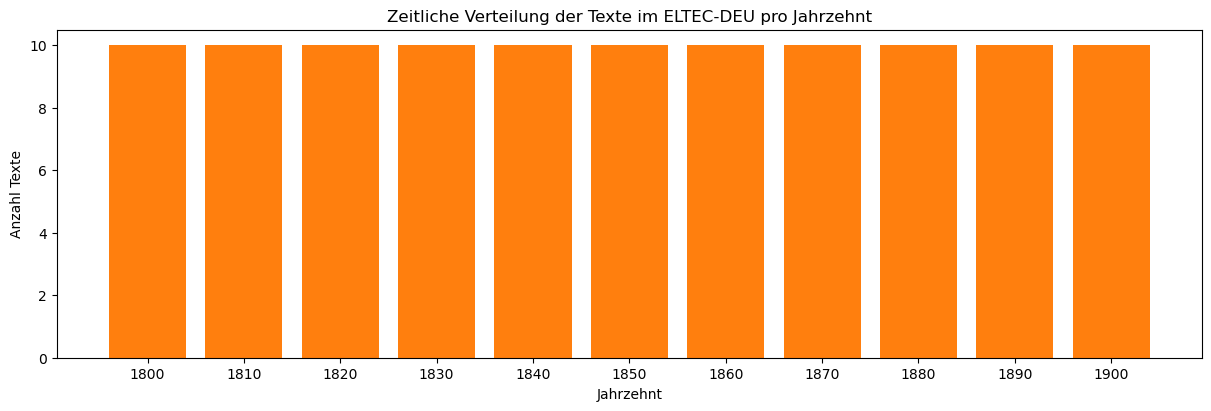

In [12]:
# Visualisierung der Dekadenverteilung (Textanzahl pro Dekade)
fig_decade, ax_decade = plt.subplots(figsize=(12, 4), constrained_layout=True)
ax_decade.bar(decade_counts.index.astype(str), decade_counts.values, color="tab:orange")
ax_decade.set_title("Zeitliche Verteilung der Texte im ELTEC-DEU pro Jahrzehnt")
ax_decade.set_xlabel("Jahrzehnt")
ax_decade.set_ylabel("Anzahl Texte")
plt.show()

## Reflexion: Auswahl als epistemische Entscheidung

Die Entscheidung für ein bestimmtes Korpus ist nie neutral.
Sie bestimmt, **welche literarischen Stimmen, Räume und historischen Kontexte** in der Analyse sichtbar werden.
Die bewusste Reflexion über diese Auswahl ist ein zentraler Bestandteil datenbasierter geisteswissenschaftlicher Forschung.

```{admonition} Merksatz
:class: keypoint
Mit der Auswahl eines Korpus konstruieren wir das epistemische Objekt unserer Forschung – und damit die Grenzen dessen, was wir erkennen können.
```